In [1]:
import h5py
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

cdm_galaxy = h5py.File('Data\COLOR_CDM_galaxies.hdf5', 'r')
wdm_galaxy = h5py.File('Data\COLOR_WDM_galaxies.hdf5', 'r')

print(cdm_galaxy,wdm_galaxy)

<HDF5 file "COLOR_CDM_galaxies.hdf5" (mode r)> <HDF5 file "COLOR_WDM_galaxies.hdf5" (mode r)>


# Access the masses and positions of CDM and WDM galaxies

In [2]:
# Access mass/position for wdm/cdm
print(list(cdm_galaxy.keys()),list(wdm_galaxy.keys()))

cdm_galaxy_color = cdm_galaxy['Colour'][:]
cdm_galaxy_position = cdm_galaxy['GalaxyPos'][:]
cdm_galaxy_mass = cdm_galaxy['StellarMass'][:]

wdm_galaxy_color = wdm_galaxy['Colour'][:]
wdm_galaxy_position = wdm_galaxy['GalaxyPos'][:]
wdm_galaxy_mass = wdm_galaxy['StellarMass'][:]

cdm_galaxy_color, cdm_galaxy_position, cdm_galaxy_mass, 
wdm_galaxy_color, wdm_galaxy_position,wdm_galaxy_mass

['Colour', 'GalaxyPos', 'IsCentral', 'StellarMass'] ['Colour', 'GalaxyPos', 'IsCentral', 'StellarMass']


(array([0.29584217, 0.29859257, 0.59355354, ..., 0.32156372, 0.59656096,
        0.32803154]), array([[17.61932182, 79.06235504, 52.68593979],
        [18.65647697, 80.58162689, 52.30108261],
        [18.58250046, 80.91363525, 52.45199203],
        ...,
        [76.68208313, 28.50509262, 59.96631622],
        [33.62237167,  9.74790382,  4.82571173],
        [52.58901978, 44.79496765, 78.47211456]]), array([3873670.  , 5328977.  , 1002360.25, ..., 2697151.5 ,  542400.5 ,
        2462471.  ]))

# Import the sphere and envelope masses

In [3]:
cdm_5Mpc_sphere_mass = np.genfromtxt("Calculations/cdm_5Mpc_sphere_mass_filtered.txt")
wdm_5Mpc_sphere_mass = np.genfromtxt("Calculations/wdm_5Mpc_sphere_mass_filtered.txt")

In [4]:
cdm_10Mpc_sphere_mass = np.genfromtxt("Calculations/cdm_10Mpc_sphere_mass_filtered.txt")
wdm_10Mpc_sphere_mass = np.genfromtxt("Calculations/wdm_10Mpc_sphere_mass_filtered.txt")

In [5]:
cdm_envelope_mass=cdm_10Mpc_sphere_mass-cdm_5Mpc_sphere_mass
wdm_envelope_mass=wdm_10Mpc_sphere_mass-wdm_5Mpc_sphere_mass
len(cdm_envelope_mass),len(wdm_envelope_mass),cdm_envelope_mass, wdm_envelope_mass

(661632, 477870, array([5.29543271e+14, 5.29879347e+14, 5.48000056e+14, ...,
        7.09475586e+13, 7.22646416e+14, 6.72348636e+14]), array([5.61700612e+14, 5.19950930e+14, 5.67300725e+14, ...,
        1.25458107e+14, 8.05311434e+13, 4.94819599e+13]))

# Plot the positions of galaxies in different environments
### Split the galaxies into the top 20% and bottom 20%, filtering out galaxies < 10$^6$ M$_\odot$

In [6]:
# filter out galaxies less than 10^6 solar masses
cdm_envelope_mass_filtered=cdm_envelope_mass[cdm_galaxy_mass>10**6]
wdm_envelope_mass_filtered=wdm_envelope_mass[wdm_galaxy_mass>10**6]

cdm_galaxy_position_filtered=cdm_galaxy_position[cdm_galaxy_mass>10**6]
wdm_galaxy_position_filtered=wdm_galaxy_position[wdm_galaxy_mass>10**6]

len(cdm_galaxy_mass),len(cdm_galaxy_position_filtered)

(661632, 407397)

In [7]:
frac = 20.0
th_low_cdm = np.percentile(cdm_envelope_mass_filtered,frac)
th_top_cdm = np.percentile(cdm_envelope_mass_filtered,100.-frac)
th_low_wdm = np.percentile(wdm_envelope_mass_filtered,frac)
th_top_wdm = np.percentile(wdm_envelope_mass_filtered,100.-frac)

cdm_top_galaxy_position = cdm_galaxy_position_filtered[cdm_envelope_mass_filtered>th_top_cdm]
cdm_low_galaxy_position = cdm_galaxy_position_filtered[cdm_envelope_mass_filtered<th_low_cdm]
wdm_top_galaxy_position = wdm_galaxy_position_filtered[wdm_envelope_mass_filtered>th_top_wdm]
wdm_low_galaxy_position = wdm_galaxy_position_filtered[wdm_envelope_mass_filtered<th_low_wdm]

### Plot CDM first

In [8]:
top,bottom,d=70,30,1

cdm_top_ind=[(cdm_top_galaxy_position[:,0]>bottom) & (cdm_top_galaxy_position[:,0]<top),
             (cdm_top_galaxy_position[:,1]>bottom) & (cdm_top_galaxy_position[:,1]<top),
             (cdm_top_galaxy_position[:,2]>bottom) & (cdm_top_galaxy_position[:,2]<top)]
cdm_low_ind=[(cdm_low_galaxy_position[:,0]>bottom) & (cdm_low_galaxy_position[:,0]<top),
             (cdm_low_galaxy_position[:,1]>bottom) & (cdm_low_galaxy_position[:,1]<top),
             (cdm_low_galaxy_position[:,2]>bottom) & (cdm_low_galaxy_position[:,2]<top)]

cdm_top_galaxy_position[cdm_top_ind[2]][:,0],cdm_low_galaxy_position[cdm_low_ind[2]][:,0]

(array([17.43208122, 19.06316185, 14.26017475, ...,  4.40739155,
         2.2900064 ,  7.28926134]),
 array([ 2.25718856, 47.51541519, 47.7658844 , ..., 93.98501587,
        39.41768265, 13.64674759]))

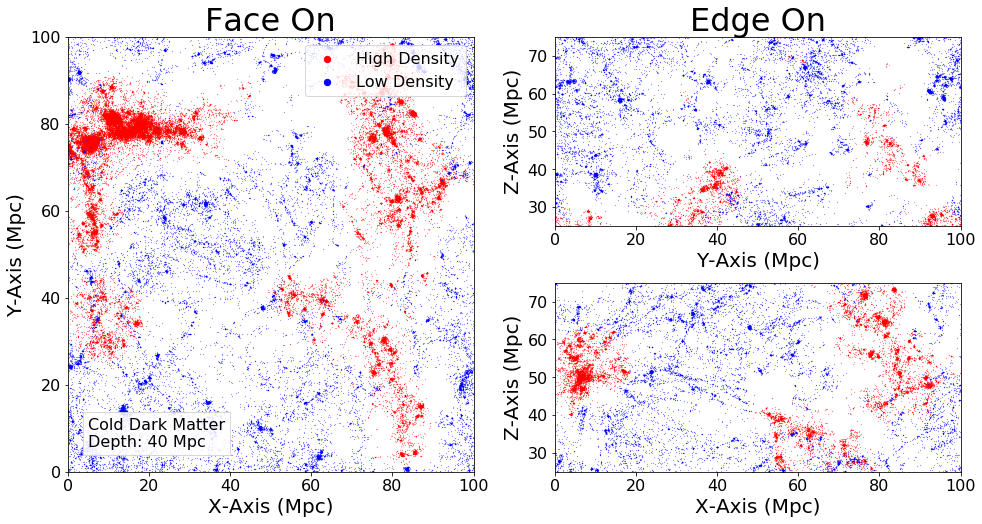

In [9]:
fig = plt.figure(figsize = (16,8))
gs = gridspec.GridSpec(2, 2)

textstr = '\n'.join((
    r'Cold Dark Matter',
    r'Depth: 40 Mpc'))
props = dict(facecolor='white', edgecolor='lightgrey', pad = 5.0, alpha=0.875)

ax1 = fig.add_subplot(gs[:,0])
ax1.scatter(cdm_top_galaxy_position[cdm_top_ind[2]][:,0][0::d],
            cdm_top_galaxy_position[cdm_top_ind[2]][:,1][0::d], s = 0.025,label="High Density",c='r')
ax1.scatter(cdm_low_galaxy_position[cdm_low_ind[2]][:,0][0::d],
            cdm_low_galaxy_position[cdm_low_ind[2]][:,1][0::d], s = 0.025,label="Low Density",c='b')
ax1.text(0.05, 0.125, textstr, transform=ax1.transAxes, fontsize=16, verticalalignment='top', bbox=props)
ax1.legend(fontsize = 16, loc='upper right', markerscale=40)
ax1.set_xlabel('X-Axis (Mpc)', fontsize = 20)
ax1.set_ylabel('Y-Axis (Mpc)', fontsize = 20)
ax1.set_title('Face On', fontsize = 32)
ax1.tick_params(labelsize=16)
ax1.set_ylim(0,100)

ax2 = fig.add_subplot(gs[:1,1])
ax2.scatter(cdm_top_galaxy_position[cdm_top_ind[0]][:,1][0::d],
            cdm_top_galaxy_position[cdm_top_ind[0]][:,2][0::d], s = 0.025,label="High Density",c='r')
ax2.scatter(cdm_low_galaxy_position[cdm_low_ind[0]][:,1][0::d],
            cdm_low_galaxy_position[cdm_low_ind[0]][:,2][0::d], s = 0.025,label="Low Density",c='b')
ax2.set_xlabel('Y-Axis (Mpc)', fontsize = 20)
ax2.set_ylabel('Z-Axis (Mpc)', fontsize = 20)
ax2.set_title('Edge On', fontsize = 32)
ax2.tick_params(labelsize=16)
ax2.set_ylim(25,75)

ax3 = fig.add_subplot(gs[1:,1])
ax3.scatter(cdm_top_galaxy_position[cdm_top_ind[1]][:,0][0::d],
            cdm_top_galaxy_position[cdm_top_ind[1]][:,2][0::d], s = 0.025,label="High Density",c='r')
ax3.scatter(cdm_low_galaxy_position[cdm_low_ind[1]][:,0][0::d],
            cdm_low_galaxy_position[cdm_low_ind[1]][:,2][0::d], s = 0.025,label="Low Density",c='b')
ax3.set_xlabel('X-Axis (Mpc)', fontsize = 20)
ax3.set_ylabel('Z-Axis (Mpc)', fontsize = 20)
ax3.tick_params(labelsize=16)
ax3.set_ylim(25,75)

for axis in [ax1, ax2, ax3]:
    axis.set_xlim(0,100)

gs.update(wspace=0.2, hspace=0.3)
fig.savefig('Images/Summer2020/CDM_2D_Envelope_Mass_Plot_Galaxy_40Mpc.png')              
plt.show()

### Then WDM

In [10]:
top,bottom,d=70,30,1

wdm_top_ind=[(wdm_top_galaxy_position[:,0]>bottom) & (wdm_top_galaxy_position[:,0]<top),
             (wdm_top_galaxy_position[:,1]>bottom) & (wdm_top_galaxy_position[:,1]<top),
             (wdm_top_galaxy_position[:,2]>bottom) & (wdm_top_galaxy_position[:,2]<top)]
wdm_low_ind=[(wdm_low_galaxy_position[:,0]>bottom) & (wdm_low_galaxy_position[:,0]<top),
             (wdm_low_galaxy_position[:,1]>bottom) & (wdm_low_galaxy_position[:,1]<top),
             (wdm_low_galaxy_position[:,2]>bottom) & (wdm_low_galaxy_position[:,2]<top)]

wdm_top_galaxy_position[wdm_top_ind[2]][:,0],wdm_low_galaxy_position[wdm_low_ind[2]][:,0]

(array([17.61932182, 18.65647697, 18.58250046, ...,  7.98764038,
        79.72234344, 13.31158161]),
 array([13.57945633, 13.04772949, 50.91545105, ..., 99.51027679,
        54.04185104, 11.54162788]))

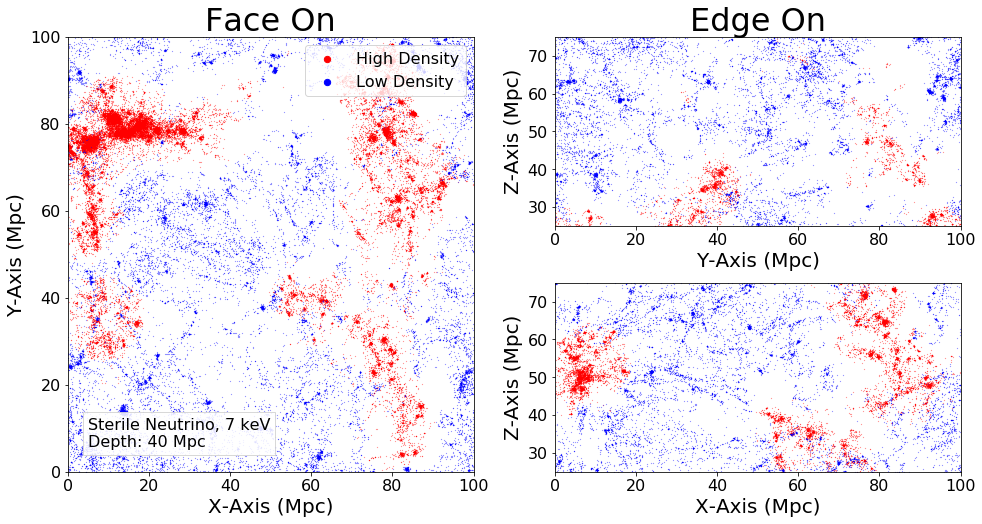

In [11]:
fig = plt.figure(figsize = (16,8))
gs = gridspec.GridSpec(2, 2)

textstr = '\n'.join((
    r'Sterile Neutrino, 7 keV',
    r'Depth: 40 Mpc'))
props = dict(facecolor='white', edgecolor='lightgrey', pad = 5.0, alpha=0.875)

ax1 = fig.add_subplot(gs[:,0])
ax1.scatter(wdm_top_galaxy_position[wdm_top_ind[2]][:,0][0::d],
            wdm_top_galaxy_position[wdm_top_ind[2]][:,1][0::d], s = 0.025,label="High Density",c='r')
ax1.scatter(wdm_low_galaxy_position[wdm_low_ind[2]][:,0][0::d],
            wdm_low_galaxy_position[wdm_low_ind[2]][:,1][0::d], s = 0.025,label="Low Density",c='b')
ax1.text(0.05, 0.125, textstr, transform=ax1.transAxes, fontsize=16, verticalalignment='top', bbox=props)
ax1.legend(fontsize = 16, loc='upper right', markerscale=40)
ax1.set_xlabel('X-Axis (Mpc)', fontsize = 20)
ax1.set_ylabel('Y-Axis (Mpc)', fontsize = 20)
ax1.set_title('Face On', fontsize = 32)
ax1.tick_params(labelsize=16)
ax1.set_ylim(0,100)

ax2 = fig.add_subplot(gs[:1,1])
ax2.scatter(wdm_top_galaxy_position[wdm_top_ind[0]][:,1][0::d],
            wdm_top_galaxy_position[wdm_top_ind[0]][:,2][0::d], s = 0.025,label="High Density",c='r')
ax2.scatter(wdm_low_galaxy_position[wdm_low_ind[0]][:,1][0::d],
            wdm_low_galaxy_position[wdm_low_ind[0]][:,2][0::d], s = 0.025,label="Low Density",c='b')
ax2.set_xlabel('Y-Axis (Mpc)', fontsize = 20)
ax2.set_ylabel('Z-Axis (Mpc)', fontsize = 20)
ax2.set_title('Edge On', fontsize = 32)
ax2.tick_params(labelsize=16)
ax2.set_ylim(25,75)

ax3 = fig.add_subplot(gs[1:,1])
ax3.scatter(wdm_top_galaxy_position[wdm_top_ind[1]][:,0][0::d],
            wdm_top_galaxy_position[wdm_top_ind[1]][:,2][0::d], s = 0.025,label="High Density",c='r')
ax3.scatter(wdm_low_galaxy_position[wdm_low_ind[1]][:,0][0::d],
            wdm_low_galaxy_position[wdm_low_ind[1]][:,2][0::d], s = 0.025,label="Low Density",c='b')
ax3.set_xlabel('X-Axis (Mpc)', fontsize = 20)
ax3.set_ylabel('Z-Axis (Mpc)', fontsize = 20)
ax3.tick_params(labelsize=16)
ax3.set_ylim(25,75)

for axis in [ax1, ax2, ax3]:
    axis.set_xlim(0,100)

gs.update(wspace=0.2, hspace=0.3)
fig.savefig('Images/Summer2020/WDM_2D_Envelope_Mass_Plot_Galaxy_40Mpc.png')              
plt.show()

### Try a different color scheme!

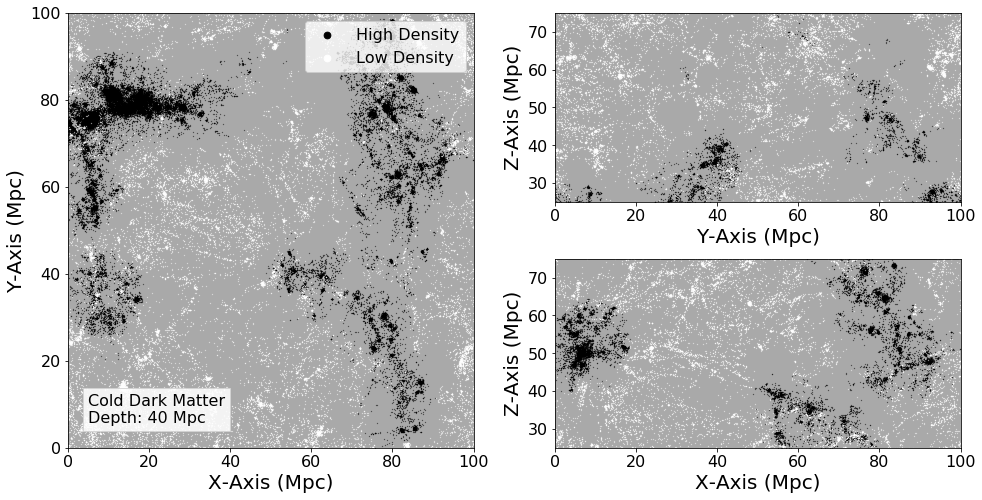

In [12]:
fig = plt.figure(figsize = (16,8))
gs = gridspec.GridSpec(2, 2)

textstr = '\n'.join((
    r'Cold Dark Matter',
    r'Depth: 40 Mpc'))
props = dict(facecolor='white', edgecolor='lightgrey', pad = 5.0, alpha=0.875)

s,label_cdm,label_wdm,c_cdm,c_wdm=0.05,"High Density","Low Density",'black','white'

ax1 = fig.add_subplot(gs[:,0])
ax1.scatter(cdm_top_galaxy_position[cdm_top_ind[2]][:,0][0::d],
            cdm_top_galaxy_position[cdm_top_ind[2]][:,1][0::d],s=s,label=label_cdm,c=c_cdm)
ax1.scatter(cdm_low_galaxy_position[cdm_low_ind[2]][:,0][0::d],
            cdm_low_galaxy_position[cdm_low_ind[2]][:,1][0::d],s=s,label=label_wdm,c=c_wdm)
ax1.text(0.05, 0.125, textstr, transform=ax1.transAxes, fontsize=16, verticalalignment='top', bbox=props)
ax1.legend(fontsize = 16, loc='upper right', markerscale=30)
ax1.set_xlabel('X-Axis (Mpc)', fontsize = 20)
ax1.set_ylabel('Y-Axis (Mpc)', fontsize = 20)
ax1.tick_params(labelsize=16)
ax1.set_ylim(0,100)

ax2 = fig.add_subplot(gs[:1,1])
ax2.scatter(cdm_top_galaxy_position[cdm_top_ind[0]][:,1][0::d],
            cdm_top_galaxy_position[cdm_top_ind[0]][:,2][0::d], s = s,label=label_cdm,c=c_cdm)
ax2.scatter(cdm_low_galaxy_position[cdm_low_ind[0]][:,1][0::d],
            cdm_low_galaxy_position[cdm_low_ind[0]][:,2][0::d], s = s,label=label_wdm,c=c_wdm)
ax2.set_xlabel('Y-Axis (Mpc)', fontsize = 20)
ax2.set_ylabel('Z-Axis (Mpc)', fontsize = 20)
ax2.tick_params(labelsize=16)
ax2.set_ylim(25,75)

ax3 = fig.add_subplot(gs[1:,1])
ax3.scatter(cdm_top_galaxy_position[cdm_top_ind[1]][:,0][0::d],
            cdm_top_galaxy_position[cdm_top_ind[1]][:,2][0::d], s = s,label=label_cdm,c=c_cdm)
ax3.scatter(cdm_low_galaxy_position[cdm_low_ind[1]][:,0][0::d],
            cdm_low_galaxy_position[cdm_low_ind[1]][:,2][0::d], s = s,label=label_wdm,c=c_wdm)
ax3.set_xlabel('X-Axis (Mpc)', fontsize = 20)
ax3.set_ylabel('Z-Axis (Mpc)', fontsize = 20)
ax3.tick_params(labelsize=16)
ax3.set_ylim(25,75)

for axis in [ax1, ax2, ax3]:
    axis.set_facecolor('darkgray')
    axis.set_xlim(0,100)

gs.update(wspace=0.2, hspace=0.3)
fig.savefig('Images/Summer2020/2D_Envelope_Mass_Plot_Galaxy_40Mpc.png')              
plt.show()

# Calculate the correlation function for high and low density galaxies
### Send the galaxy positions to Odyssey

In [13]:
np.savetxt('Calculations/cdm_top_galaxy_position.txt',cdm_top_galaxy_position)
np.savetxt('Calculations/cdm_low_galaxy_position.txt',cdm_low_galaxy_position)
np.savetxt('Calculations/wdm_top_galaxy_position.txt',wdm_top_galaxy_position)
np.savetxt('Calculations/wdm_low_galaxy_position.txt',wdm_low_galaxy_position)

C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide
C:\Users\shife\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


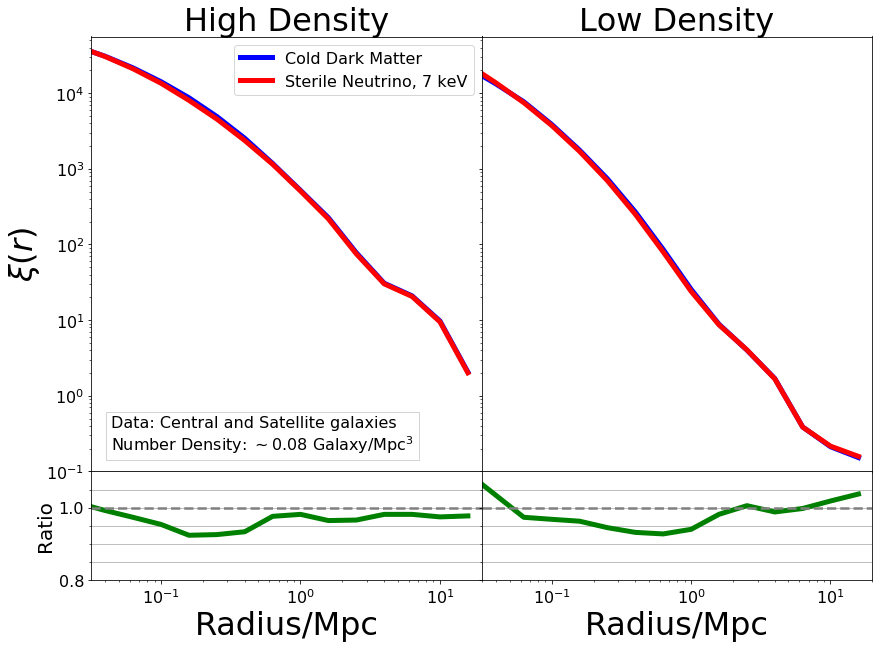

In [14]:
CUTE_cdm_high = np.genfromtxt("Output/corr_cdm_top_galaxy_position.txt", usecols = (0,1))
CUTE_cdm_low = np.genfromtxt("Output/corr_cdm_low_galaxy_position.txt", usecols = (0,1))
CUTE_wdm_high = np.genfromtxt("Output/corr_wdm_top_galaxy_position.txt", usecols = (0,1))
CUTE_wdm_low = np.genfromtxt("Output/corr_wdm_low_galaxy_position.txt", usecols = (0,1))

textstr = '\n'.join((
    r'Data: Central and Satellite galaxies',
    r'Number Density: $\sim0.08$ Galaxy/Mpc$^{3}$'))
props = dict(facecolor='none', edgecolor='lightgrey', pad = 5.0)

plt.figure(figsize=(14,10))
grid = gridspec.GridSpec(2,2, height_ratios = [4,1])
grid.update(hspace = 0, wspace = 0)
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])
grid2 = plt.subplot(grid[2])
grid3 = plt.subplot(grid[3])

#High density
grid0.loglog(CUTE_cdm_high[:,0], CUTE_cdm_high[:,1], label = "Cold Dark Matter", linewidth = 5, color = "blue")
grid0.loglog(CUTE_wdm_high[:,0], CUTE_wdm_high[:,1], label = "Sterile Neutrino, 7 keV", linewidth = 5, 
             color = "red")
grid0.text(0.05, 0.125, textstr, transform=grid0.transAxes, fontsize=16, verticalalignment='top', bbox=props)
grid0.set_ylabel(r"$\xi(r)$", fontsize = 32)
grid0.legend(fontsize = 16)
grid0.set_title('High Density',fontsize=32)

grid2.semilogx(CUTE_wdm_high[:,0], CUTE_wdm_high[:,1]/CUTE_cdm_high[:,1], linewidth = 5, color = "green")
grid2.set_xlabel("Radius/Mpc", fontsize = 32)
grid2.set_ylabel("Ratio", fontsize=20)
grid2.axhline(y = 1, color = "grey", ls = "--", linewidth = 2.5)
grid2.set_xlim(10**-1.75, 2e1)
grid2.set_ylim(0.4, 1.4)

#Low density
grid1.loglog(CUTE_cdm_low[:,0], CUTE_cdm_low[:,1], label = "Cold Dark Matter", linewidth = 5, color = "blue")
grid1.loglog(CUTE_wdm_low[:,0], CUTE_wdm_low[:,1], label = "Sterile Neutrino, 7 keV", linewidth = 5, 
             color = "red")
grid1.set_xlim(10**-1.75, 2e1)
grid1.set_title('Low Density',fontsize=32)

grid3.semilogx(CUTE_wdm_low[:,0], CUTE_wdm_low[:,1]/CUTE_cdm_low[:,1], linewidth = 5, color = "green")
grid3.set_xlabel("Radius/Mpc", fontsize = 32)
grid3.axhline(y = 1, color = "grey", ls = "--", linewidth = 2.5)
grid3.set_ylim(0.4, 1.4)

for i in range(4):
    plt.subplot(grid[i]).set_xlim(10**-1.5, 2e1)
    plt.subplot(grid[i]).minorticks_on()
    plt.subplot(grid[i]).tick_params(labelsize=16)
    
for i in [0,1]:
    plt.subplot(grid[i]).set_ylim(10**-1, 10**4.75)
    
for i in [2,3]:
    plt.subplot(grid[i]).set_ylim(0.8, 1.1)
    plt.subplot(grid[i]).yaxis.grid(which = "both")
    
for i in [1,3]:
    plt.subplot(grid[i]).set_yticklabels([])
    
plt.show()

# Try it again with fixed abundance
### Sort the galaxies from highest to lowest mass

In [15]:
cdm_galaxy_mass_filtered=cdm_galaxy_mass[cdm_galaxy_mass>10**6]
wdm_galaxy_mass_filtered=wdm_galaxy_mass[wdm_galaxy_mass>10**6]

len(cdm_galaxy_mass_filtered)

407397

In [16]:
cdm_top_galaxy_mass_filtered = cdm_galaxy_mass_filtered[cdm_envelope_mass_filtered>th_top_cdm]
cdm_low_galaxy_mass_filtered = cdm_galaxy_mass_filtered[cdm_envelope_mass_filtered<th_low_cdm]
wdm_top_galaxy_mass_filtered = wdm_galaxy_mass_filtered[wdm_envelope_mass_filtered>th_top_wdm]
wdm_low_galaxy_mass_filtered = wdm_galaxy_mass_filtered[wdm_envelope_mass_filtered<th_low_wdm]

In [17]:
cdm_len,wdm_len = len(cdm_top_galaxy_mass_filtered), len(wdm_top_galaxy_mass_filtered)
cdm_top_galaxy_mass_ind = sorted(range(cdm_len), key=lambda k: cdm_top_galaxy_mass_filtered[k], reverse = True)
cdm_low_galaxy_mass_ind = sorted(range(cdm_len), key=lambda k: cdm_low_galaxy_mass_filtered[k], reverse = True)
wdm_top_galaxy_mass_ind = sorted(range(wdm_len), key=lambda k: wdm_top_galaxy_mass_filtered[k], reverse = True)
wdm_low_galaxy_mass_ind = sorted(range(wdm_len), key=lambda k: wdm_low_galaxy_mass_filtered[k], reverse = True)

cdm_top_galaxy_mass_filtered[cdm_top_galaxy_mass_ind], cdm_low_galaxy_mass_filtered[cdm_low_galaxy_mass_ind]

(array([3.56176069e+11, 2.93528273e+11, 2.72872047e+11, ...,
        1.00003362e+06, 1.00002256e+06, 1.00001119e+06]),
 array([1.89113467e+11, 1.85729303e+11, 1.66662980e+11, ...,
        1.00031750e+06, 1.00024888e+06, 1.00007712e+06]))

### Send the galaxy positions to Odyssey at n = 0.03 Galaxy/Mpc$^3$

In [18]:
np.savetxt("Calculations/cdm_top_galaxy_position_filtered.txt", 
           cdm_top_galaxy_position[cdm_top_galaxy_mass_ind[:30000]], fmt = "%f %f %f")
np.savetxt("Calculations/cdm_low_galaxy_position_filtered.txt", 
           cdm_low_galaxy_position[cdm_low_galaxy_mass_ind[:30000]], fmt = "%f %f %f")
np.savetxt("Calculations/wdm_top_galaxy_position_filtered.txt", 
           wdm_top_galaxy_position[wdm_top_galaxy_mass_ind[:30000]], fmt = "%f %f %f")
np.savetxt("Calculations/wdm_low_galaxy_position_filtered.txt", 
           wdm_low_galaxy_position[wdm_low_galaxy_mass_ind[:30000]], fmt = "%f %f %f")

C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


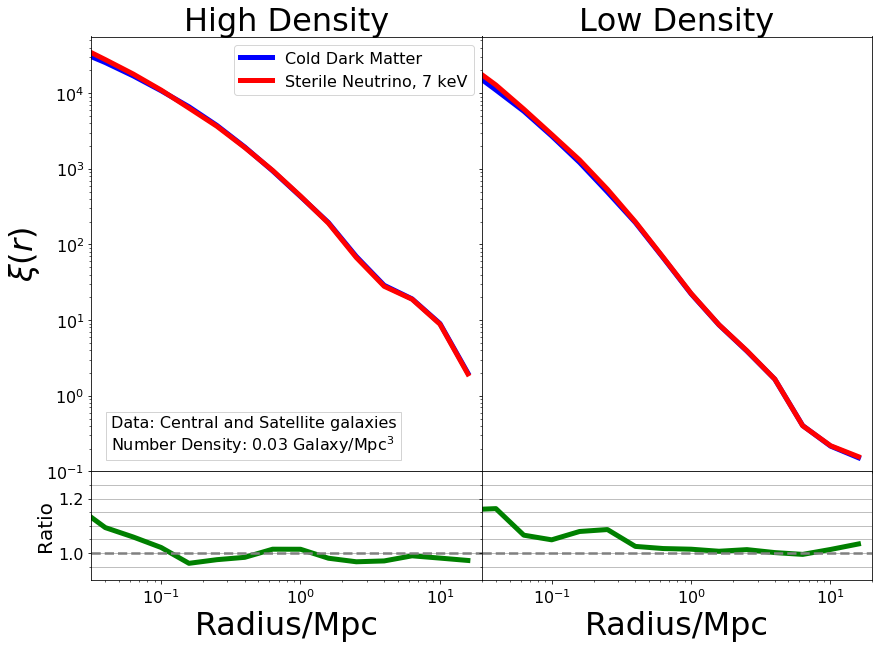

In [19]:
CUTE_cdm_high = np.genfromtxt("Output/corr_cdm_top_galaxy_position_filtered.txt", usecols = (0,1))
CUTE_cdm_low = np.genfromtxt("Output/corr_cdm_low_galaxy_position_filtered.txt", usecols = (0,1))
CUTE_wdm_high = np.genfromtxt("Output/corr_wdm_top_galaxy_position_filtered.txt", usecols = (0,1))
CUTE_wdm_low = np.genfromtxt("Output/corr_wdm_low_galaxy_position_filtered.txt", usecols = (0,1))

textstr = '\n'.join((
    r'Data: Central and Satellite galaxies',
    r'Number Density: 0.03 Galaxy/Mpc$^{3}$'))
props = dict(facecolor='none', edgecolor='lightgrey', pad = 5.0)

plt.figure(figsize=(14,10))
grid = gridspec.GridSpec(2,2, height_ratios = [4,1])
grid.update(hspace = 0, wspace = 0)
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])
grid2 = plt.subplot(grid[2])
grid3 = plt.subplot(grid[3])

#High density
grid0.loglog(CUTE_cdm_high[:,0], CUTE_cdm_high[:,1], label = "Cold Dark Matter", linewidth = 5, color = "blue")
grid0.loglog(CUTE_wdm_high[:,0], CUTE_wdm_high[:,1], label = "Sterile Neutrino, 7 keV", linewidth = 5, 
             color = "red")
grid0.text(0.05, 0.125, textstr, transform=grid0.transAxes, fontsize=16, verticalalignment='top', bbox=props)
grid0.set_ylabel(r"$\xi(r)$", fontsize = 32)
grid0.set_title('High Density',fontsize=32)
grid0.legend(fontsize = 16)

grid2.semilogx(CUTE_wdm_high[:,0], CUTE_wdm_high[:,1]/CUTE_cdm_high[:,1], linewidth = 5, color = "green")
grid2.set_xlabel("Radius/Mpc", fontsize = 32)
grid2.set_ylabel("Ratio", fontsize=20)
grid2.axhline(y = 1, color = "grey", ls = "--", linewidth = 2.5)

#Low density
grid1.loglog(CUTE_cdm_low[:,0], CUTE_cdm_low[:,1], label = "Cold Dark Matter", linewidth = 5, color = "blue")
grid1.loglog(CUTE_wdm_low[:,0], CUTE_wdm_low[:,1], label = "Sterile Neutrino, 7 keV", linewidth = 5, 
             color = "red")
grid1.set_title('Low Density',fontsize=32)

grid3.semilogx(CUTE_wdm_low[:,0], CUTE_wdm_low[:,1]/CUTE_cdm_low[:,1], linewidth = 5, color = "green")
grid3.set_xlabel("Radius/Mpc", fontsize = 32)
grid3.axhline(y = 1, color = "grey", ls = "--", linewidth = 2.5)

for i in range(4):
    plt.subplot(grid[i]).set_xlim(10**-1.5, 2e1)
    plt.subplot(grid[i]).minorticks_on()
    plt.subplot(grid[i]).tick_params(labelsize=16)
    
for i in [0,1]:
    plt.subplot(grid[i]).set_ylim(10**-1, 10**4.75)
    
for i in [2,3]:
    plt.subplot(grid[i]).set_ylim(0.9, 1.3)
    plt.subplot(grid[i]).yaxis.grid(which = "both")
    
for i in [1,3]:
    plt.subplot(grid[i]).set_yticklabels([])
    
plt.savefig('Images/Summer2020/Correlation.pdf')
plt.show()